In [ ]:
%pwd

'/content'

In [12]:
import os
import pandas as pd
import timm
from fastai.vision.all import *
from fastai.vision import models
from fastai.metrics import accuracy, F1Score

import warnings
warnings.filterwarnings("ignore")
set_seed(42)

print ('modules loaded')

modules loaded


In [13]:
data_dir = './input/mango-leaf-disease-dataset'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df

,filepaths,labels
0,./input/mango-leaf-disease-dataset/Die Back/20211129_160927 (Custom).jpg,Die Back
1,./input/mango-leaf-disease-dataset/Die Back/20211129_163852 (Custom).jpg,Die Back
2,./input/mango-leaf-disease-dataset/Die Back/20211129_162222 (Custom).jpg,Die Back
3,./input/mango-leaf-disease-dataset/Die Back/20211129_162226 (Custom).jpg,Die Back
4,./input/mango-leaf-disease-dataset/Die Back/20211129_163702 (Custom).jpg,Die Back
...,...,...
3995,./input/mango-leaf-disease-dataset/Bacterial Canker/IMG_20211106_141741 (Custom).jpg,Bacterial Canker
3996,./input/mango-leaf-disease-dataset/Bacterial Canker/IMG_20211106_142912 (Custom).jpg,Bacterial Canker
3997,./input/mango-leaf-disease-dataset/Bacterial Canker/IMG_20211106_143303 (Custom).jpg,Bacterial Canker
3998,./input/mango-leaf-disease-dataset/Bacterial Canker/IMG_20211106_135253 (Custom).jpg,Bacterial Canker


In [ ]:
dls = ImageDataLoaders.from_df(df,
                                fn_col=0, # filepaths
                                label_col=1, # labels
                                valid_pct=0.2,
                                folder='',
                                item_tfms=Resize(224))

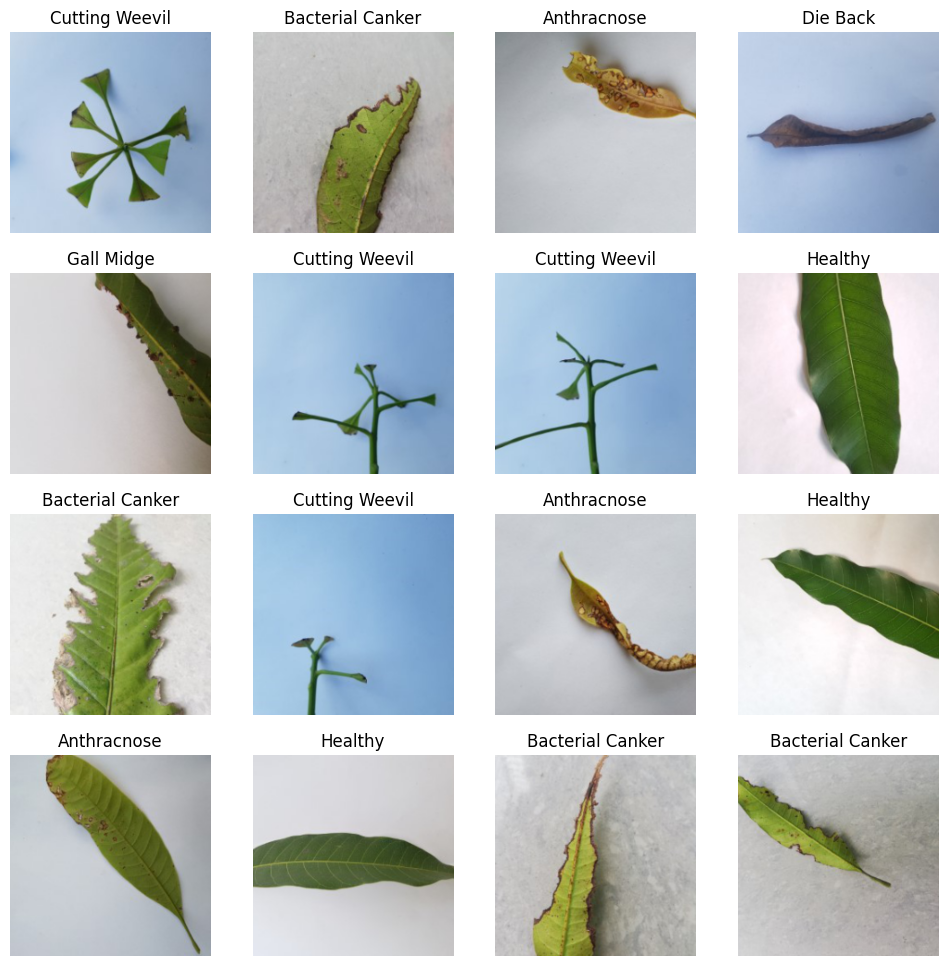

In [ ]:
dls.show_batch(max_n=16)


In [ ]:
learn = vision_learner(dls, 'efficientnet_b0', metrics=[accuracy], path='./').to_fp16()
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 112 x 112 
Conv2d                                    864        False     
Identity                                                       
SiLU                                                           
Conv2d                                    288        False     
Identity                                                       
SiLU                                                           
____________________________________________________________________________
                     64 x 8 x 1 x 1      
Conv2d                                    264        False     
SiLU                                                           
____________________________________________________________________________
                     64 x 32 x 1 x 1     
Conv2d                                    288        False     
Sigmoid                            

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.959805,0.038139,0.987500,10:31
1,0.308091,0.017391,0.992500,12:43
2,0.129596,0.012922,0.996250,13:22
3,0.062134,0.010900,0.997500,10:43
4,0.036927,0.011623,0.997500,13:10


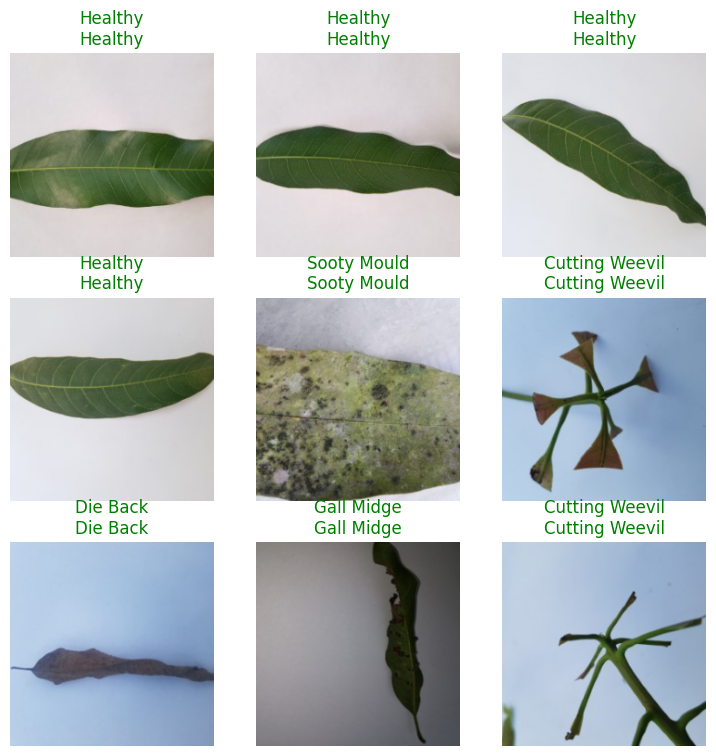

In [ ]:
learn.show_results()

In [ ]:
# Save the model
learn.export('./mango_diseases.pkl')

NameError: ignored

In [ ]:
# Build a Classification Interpretation object from our learn model
# it can show us where the model made the worse predictions:
interp = ClassificationInterpretation.from_learner(learn)

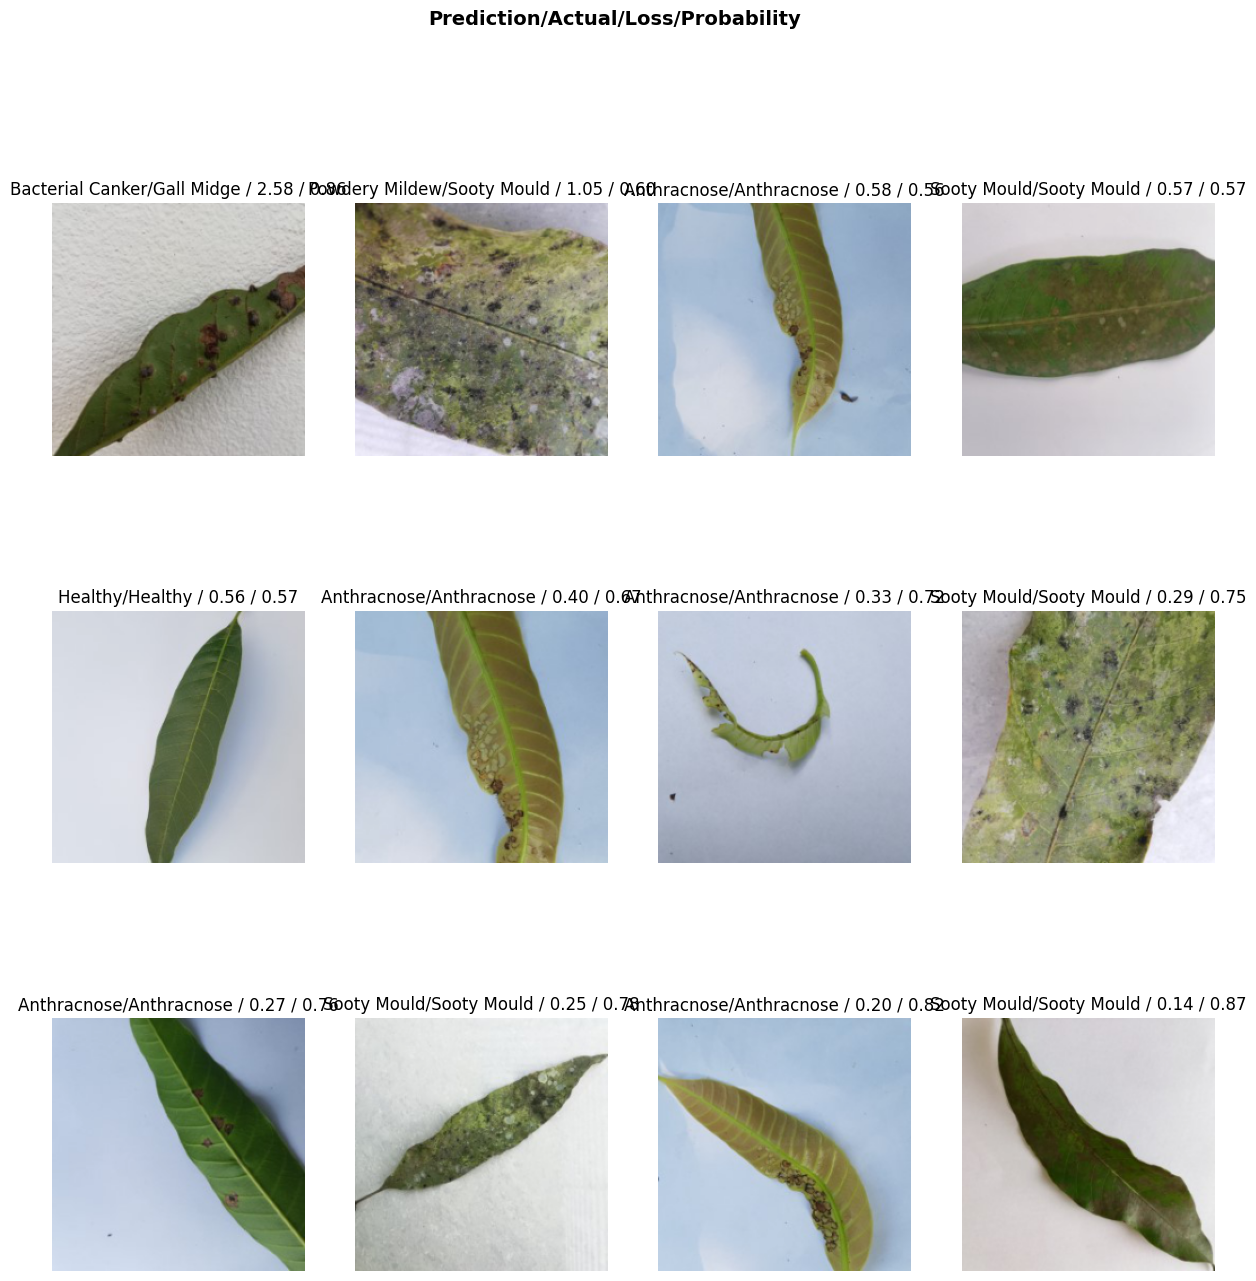

In [ ]:
# Plot the top ‘n’ classes where the classifier has least precision.
interp.plot_top_losses(12, figsize=(15, 15))

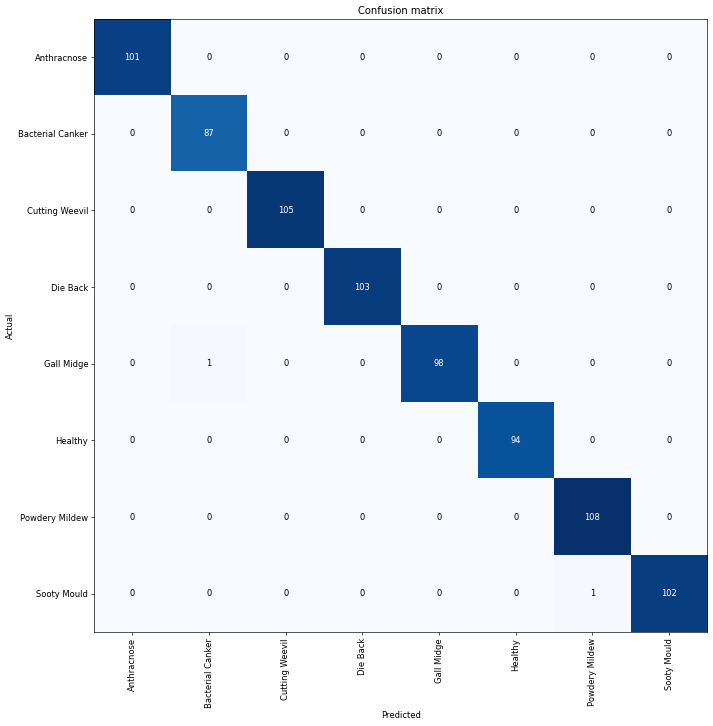

In [ ]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [ ]:
#To view the list of classes most misclassified as a list
interp.most_confused(min_val=2) #We are ignoring single image misclassification

[]